In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings 
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.diagnosis = df.diagnosis.map({
    'M':1,
    'B':0
})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
df.diagnosis.unique()

array([1, 0], dtype=int64)

M -> Malignant
b ->Benin

<Axes: >

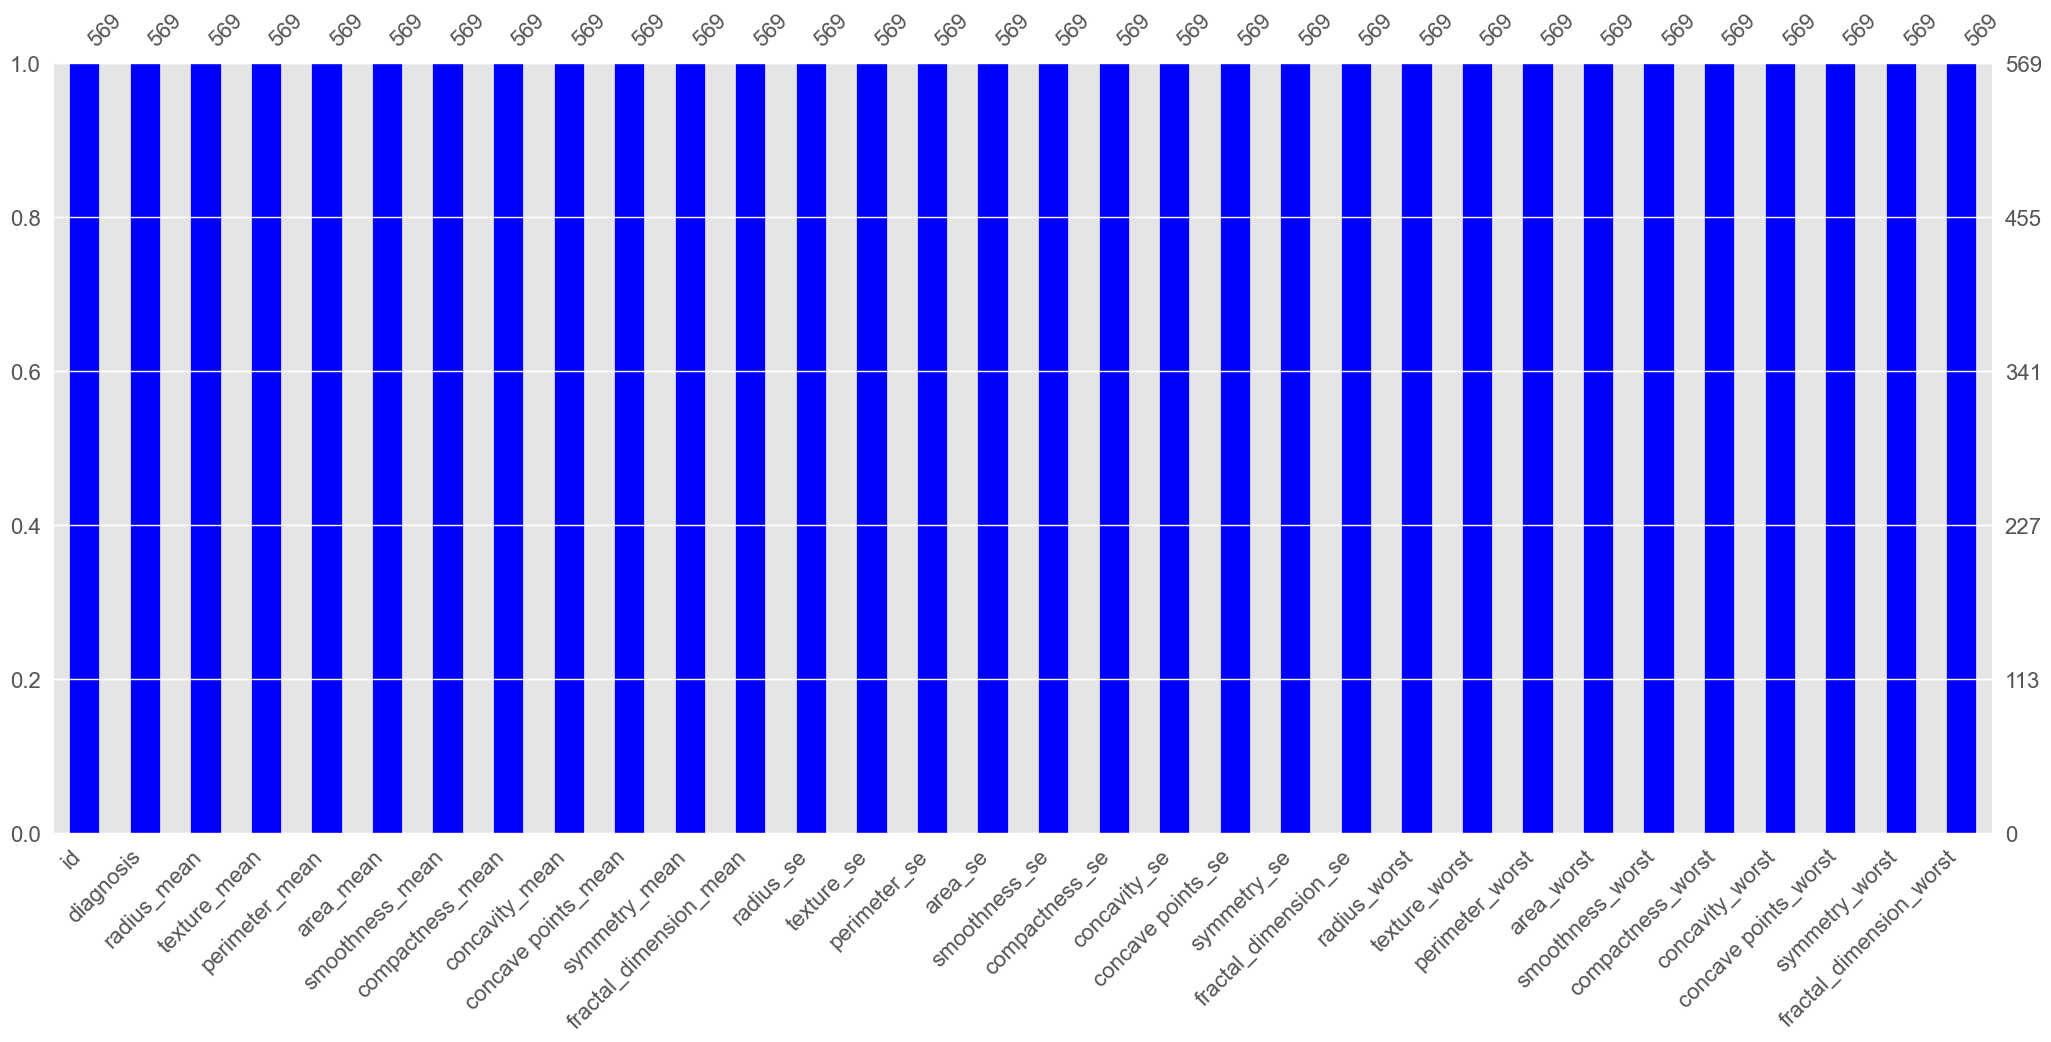

In [16]:
msno.bar(df,color='blue')

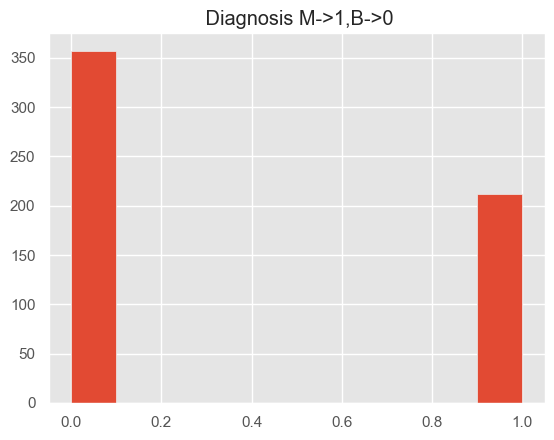

In [17]:
plt.hist(df.diagnosis)
plt.title(" Diagnosis M->1,B->0")
plt.show()

## EDA

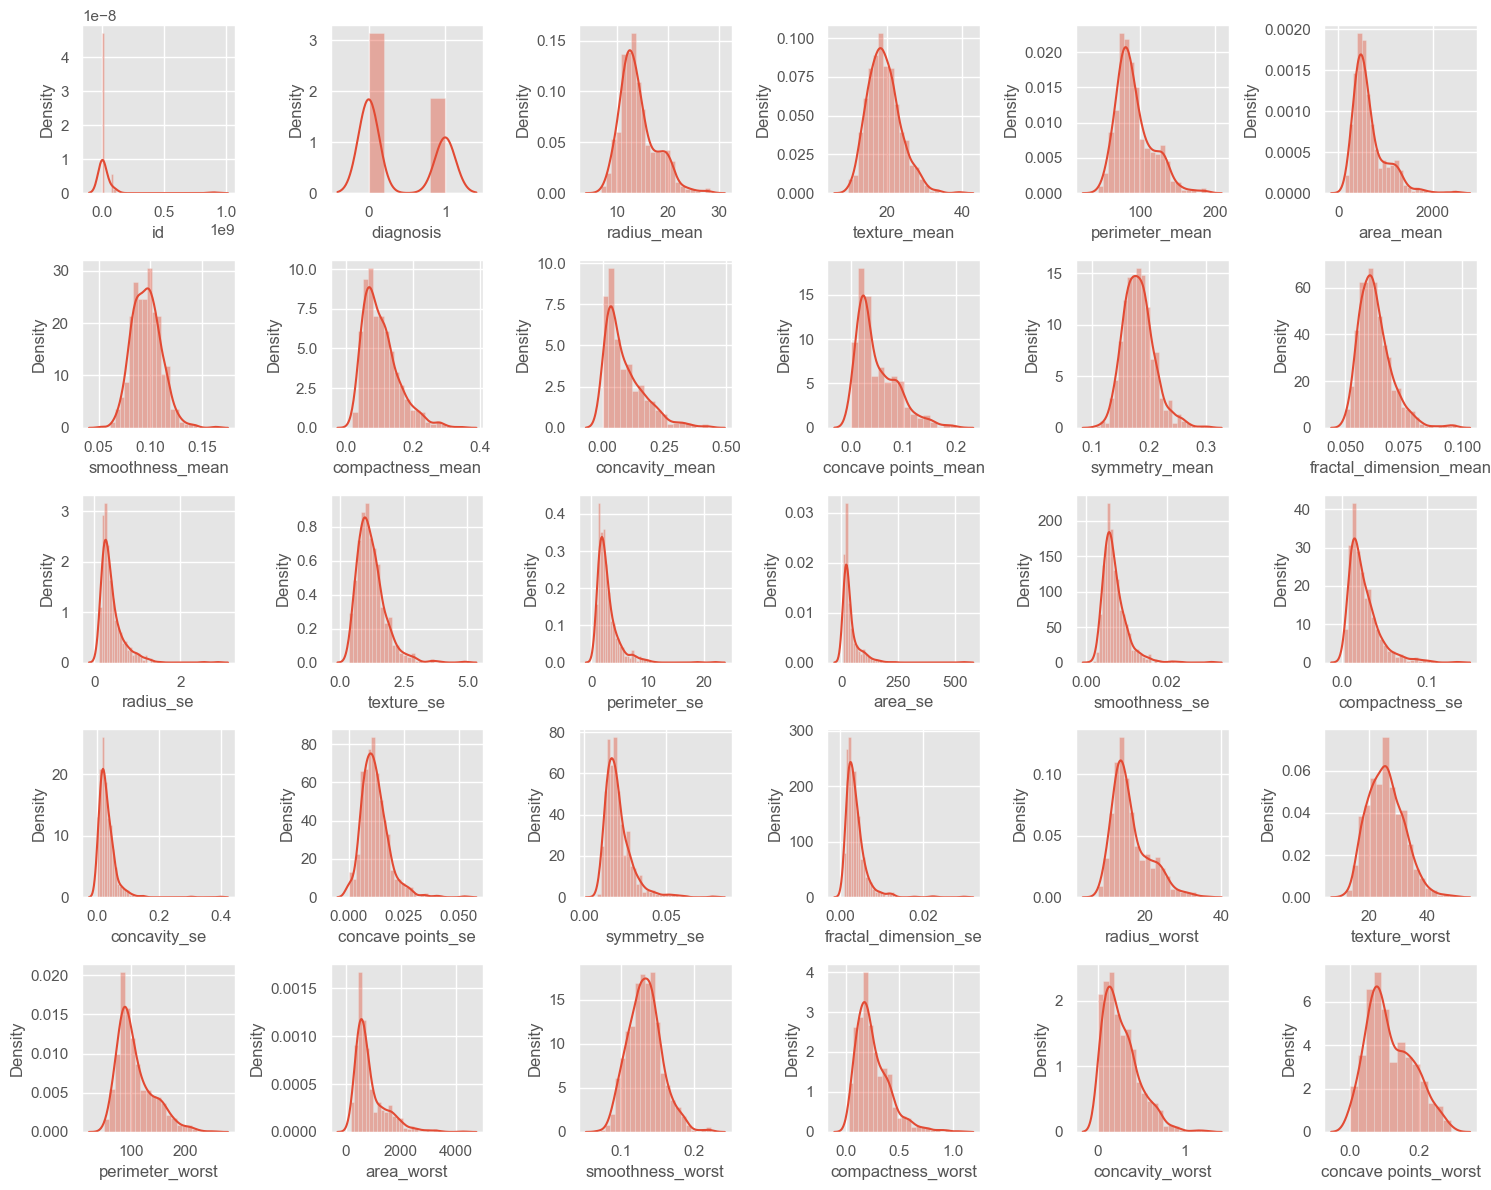

In [18]:
plotnumber = 1
plt.figure(figsize=(15,12))
for column in df:
    if plotnumber<=30:
        plt.subplot(5,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1

plt.tight_layout()
plt.show()

In [22]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


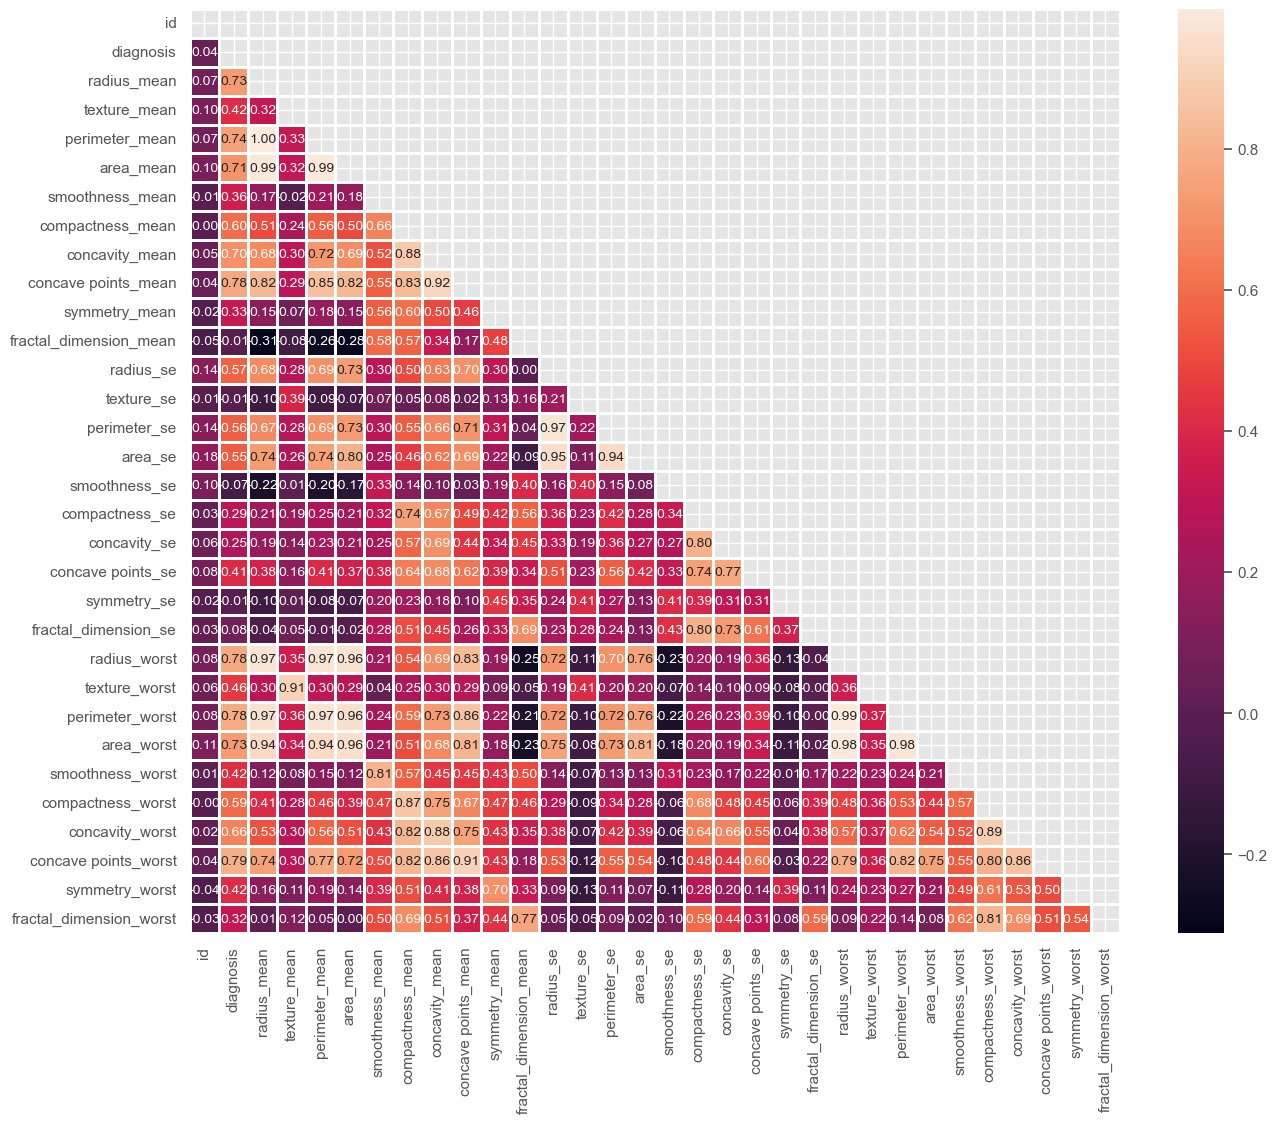

In [26]:
plt.figure(figsize=(15,12))
corr = df.corr()
mask  = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,linewidths =1 ,annot= True,fmt = ".2f")
plt.show()

feature selection 


In [27]:
corr_matrix = df.corr().abs()
mask  = np.triu(np.ones_like(corr,dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]

In [28]:
to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

In [29]:
df=df.drop(to_drop,axis =1)

In [31]:
df.drop('id',axis=1,inplace=True)

In [32]:
df

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,22.39,0.11100,0.11590,0.13890,0.1726,0.05623,1.2560,158.70,0.010300,...,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,28.25,0.09780,0.10340,0.09791,0.1752,0.05533,2.4630,99.04,0.005769,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,28.08,0.08455,0.10230,0.05302,0.1590,0.05648,1.0750,48.55,0.005903,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,29.33,0.11780,0.27700,0.15200,0.2397,0.07016,1.5950,86.22,0.006522,...,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [48]:
X = df.drop('diagnosis',axis=1)
Y = df.diagnosis

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [75]:
X_train

array([[-0.39064196,  0.3109837 , -0.5959945 , ..., -0.75798367,
        -0.01614761, -0.38503402],
       [ 0.68051405, -0.60963604, -0.90986721, ..., -0.60687023,
         0.09669004, -0.38615797],
       [-1.03333557, -0.10616078, -0.36301886, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-0.20048168,  0.32549308, -0.86763418, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-0.2245526 , -1.95247854, -1.58381121, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [ 1.14989702, -0.27592045, -0.02416323, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [76]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression()

In [77]:
y_pred = clf.predict(X_test)

In [78]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0], dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuraccy" ,accuracy_score(Y_test,y_pred))
print(" Confusion matrix", confusion_matrix(Y_test,y_pred))

print(" Classifiation report",classification_report(Y_test,y_pred))

Accuraccy 0.9649122807017544
 Confusion matrix [[66  1]
 [ 3 44]]
 Classifiation report               precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)


KNeighborsClassifier()

In [90]:
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuraccy" ,accuracy_score(Y_test,y_pred))
print(" Confusion matrix", confusion_matrix(Y_test,y_pred))

print(" Classifiation report",classification_report(Y_test,y_pred))

Accuraccy 0.9298245614035088
 Confusion matrix [[66  1]
 [ 7 40]]
 Classifiation report               precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [91]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [92]:
y_pred = dtc.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuraccy" ,accuracy_score(Y_test,y_pred))
print(" Confusion matrix", confusion_matrix(Y_test,y_pred))

print(" Classifiation report",classification_report(Y_test,y_pred))

Accuraccy 0.9473684210526315
 Confusion matrix [[63  4]
 [ 2 45]]
 Classifiation report               precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [109]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

gs = GridSearchCV(dtc,param_grid,cv =5 ,n_jobs=-1)
gs.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(min_samples_leaf=2),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [110]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'best'}

In [111]:
gs.best_score_

0.9538461538461538

In [112]:
dtc = DecisionTreeClassifier(
 max_depth =None,
 
 min_samples_leaf=2,
 min_samples_split=2,
 )
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_leaf=2)

In [113]:
y_pred = dtc.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuraccy" ,accuracy_score(Y_test,y_pred))
print(" Confusion matrix", confusion_matrix(Y_test,y_pred))

print(" Classifiation report",classification_report(Y_test,y_pred))

Accuraccy 0.956140350877193
 Confusion matrix [[64  3]
 [ 2 45]]
 Classifiation report               precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [124]:
import pickle
model = dtc
pickle.dump(model,open( " breast_cancer.pkl","wb"))